In [1]:
from RevPrep.Preparations import dataset_prep
from RevPrep.Evaluations import scoring
from RevPrep.plotting import plot
from RevPrep.Helpers.helpers import text_to_words
import glob
import json
import pandas as pd
import numpy as np
import importlib
from tqdm import tqdm
import pickle as pkl
importlib.reload(dataset_prep)
importlib.reload(scoring)
importlib.reload(plot)

<module 'RevPrep.plotting.plot' from '/mnt/01D64EB52A75D220/Windows.old/Users/Science/Documents/Projekte/MA/code/RevPrep/plotting/plot.py'>

In [2]:
file = glob.glob("goodreads_reviews_d*.gz")[0]

In [3]:
file

'goodreads_reviews_dedup.json.gz'

In [4]:
start_val = 0

In [6]:
# Create Dataset

# Load all data with respect to max memory size 

In [7]:
# repeat until all data is loaded
start_val = 0
df_data = dataset_prep.import_from_json(start_val, 5000000,file)
# Filter all reviews with less than 2 votes and drop unnecessary columns:
df = dataset_prep.filter_and_rename_df(df_data, n_votes=2)
print(len(df))
new_df = dataset_prep.assign_word_counts(df)
reviews_long, reviews_short = dataset_prep.filter_without_large_and_small_reviews(new_df, 900, 600)
pkl.dump(reviews_long,open(f"./{start_val}_pre_bs_reviews_long_dataset.pkl","wb"))
pkl.dump(reviews_short,open(f"./{start_val}_pre_bs_reviews_short_dataset.pkl","wb"))

  0%|          | 74/677043 [00:00<15:31, 726.59it/s]

677043


2/2: Filtering by short sequences: 100%|██████████| 14420/14420 [00:02<00:00, 5070.86it/s]


In [8]:
# repeat until all data is loaded
start_val = 5000000
df_data = dataset_prep.import_from_json(start_val, 5000000,file)
# Filter all reviews with less than 2 votes and drop unnecessary columns:
df = dataset_prep.filter_and_rename_df(df_data, n_votes=2)
print(len(df))
new_df = dataset_prep.assign_word_counts(df)
reviews_long, reviews_short = dataset_prep.filter_without_large_and_small_reviews(new_df, 900, 600)
pkl.dump(reviews_long,open(f"./{start_val}_pre_bs_reviews_long_dataset.pkl","wb"))
pkl.dump(reviews_short,open(f"./{start_val}_pre_bs_reviews_short_dataset.pkl","wb"))

  0%|          | 304/739455 [00:00<04:09, 2967.62it/s]

739455


2/2: Filtering by short sequences: 100%|██████████| 16272/16272 [00:03<00:00, 4523.33it/s]


In [9]:
# repeat until all data is loaded
start_val = 10000000
df_data = dataset_prep.import_from_json(start_val, 5000000,file)
# Filter all reviews with less than 2 votes and drop unnecessary columns:
df = dataset_prep.filter_and_rename_df(df_data, n_votes=2)
print(len(df))
new_df = dataset_prep.assign_word_counts(df)
reviews_long, reviews_short = dataset_prep.filter_without_large_and_small_reviews(new_df, 900, 600)
pkl.dump(reviews_long,open(f"./{start_val}_pre_bs_reviews_long_dataset.pkl","wb"))
pkl.dump(reviews_short,open(f"./{start_val}_pre_bs_reviews_short_dataset.pkl","wb"))

  0%|          | 190/661377 [00:00<06:02, 1822.40it/s]

661377


2/2: Filtering by short sequences: 100%|██████████| 14891/14891 [00:03<00:00, 4813.72it/s]


In [10]:
# repeat until all data is loaded
start_val = 15000000
df_data = dataset_prep.import_from_json(start_val, 5000000,file)
# Filter all reviews with less than 2 votes and drop unnecessary columns:
df = dataset_prep.filter_and_rename_df(df_data, n_votes=2)
print(len(df))
new_df = dataset_prep.assign_word_counts(df)
reviews_long, reviews_short = dataset_prep.filter_without_large_and_small_reviews(new_df, 900, 600)
pkl.dump(reviews_long,open(f"./{start_val}_pre_bs_reviews_long_dataset.pkl","wb"))
pkl.dump(reviews_short,open(f"./{start_val}_pre_bs_reviews_short_dataset.pkl","wb"))

  0%|          | 16/48112 [00:00<15:31, 51.64it/s] 

48112


2/2: Filtering by short sequences: 100%|██████████| 618/618 [00:00<00:00, 124853.32it/s]


### Due to memory restrictions: Merge all the known datasets now, every further procession can be done one

In [2]:
reviews_long_0 = pkl.load(open(f"./0_pre_bs_reviews_long_dataset.pkl","rb"))
reviews_short_0 = pkl.load(open(f"./0_pre_bs_reviews_short_dataset.pkl","rb"))
reviews_long_5m = pkl.load(open(f"./5000000_pre_bs_reviews_long_dataset.pkl","rb"))
reviews_short_5m = pkl.load(open(f"./5000000_pre_bs_reviews_short_dataset.pkl","rb"))
reviews_long_10m = pkl.load(open(f"./10000000_pre_bs_reviews_long_dataset.pkl","rb"))
reviews_short_10m = pkl.load(open(f"./10000000_pre_bs_reviews_short_dataset.pkl","rb"))
reviews_long_15m = pkl.load(open(f"./15000000_pre_bs_reviews_long_dataset.pkl","rb"))
reviews_short_15m = pkl.load(open(f"./15000000_pre_bs_reviews_short_dataset.pkl","rb"))

In [3]:
reviews_long = pd.concat([reviews_long_0, reviews_long_5m, reviews_long_10m, reviews_long_15m])
reviews_short = pd.concat([reviews_short_0, reviews_short_5m, reviews_short_10m, reviews_short_15m])

In [4]:
len(reviews_long)

31614

In [5]:
len(reviews_short)

343479

In [14]:
reviews_long, reviews_short = dataset_prep.combine_short_long_reviews(reviews_long, reviews_short, min_length=400)

100%|██████████| 31614/31614 [13:26<00:00, 39.21it/s]


In [15]:
reviews_long = [dataset_prep.prepare_text(i) for i in reviews_long]
reviews_short = [dataset_prep.prepare_text(i) for i in reviews_short]

In [16]:
print(len(reviews_long))

80128


In [17]:
import pickle as pkl
pkl.dump(reviews_long, open(f"./all_combined_reviews_long.pkl", "wb"))
pkl.dump(reviews_short, open(f"./all_combined_reviews_short.pkl", "wb"))

In [6]:
import pickle as pkl
reviews_long = pkl.load(open(f"./all_combined_reviews_long.pkl", "rb"))
reviews_short = pkl.load(open(f"./all_combined_reviews_short.pkl", "rb"))

In [7]:
len(reviews_short)

80128

In [32]:
# Calculate bert score and use texts only that have bertscore > x %

In [33]:
#this paper:https://arxiv.org/pdf/1909.00141.pdf

In [34]:
reviews_short, reviews_long = dataset_prep.filter_nonenglish(reviews_short, reviews_long)

100%|██████████| 80128/80128 [30:24<00:00, 43.92it/s]


In [35]:
len(reviews_long)

70268

In [36]:
import pickle as pkl
pkl.dump(reviews_long, open(f"./reviews_long_lang_filtered.pkl", "wb"))
pkl.dump(reviews_short, open(f"./reviews_short_lang_filtered.pkl", "wb"))

In [8]:
import pickle as pkl
reviews_long = pkl.load(open(f"./reviews_long_lang_filtered.pkl", "rb"))
reviews_short = pkl.load(open(f"./reviews_short_lang_filtered.pkl", "rb"))

In [9]:
len(reviews_long)

70268

In [10]:
len(reviews_short)

70268

In [11]:
from RevPrep.Preparations import dataset_prep
from RevPrep.Evaluations import scoring
from RevPrep.plotting import plot
import glob
import json
import pandas as pd
import importlib
from tqdm import tqdm
import pickle as pkl
importlib.reload(dataset_prep)
importlib.reload(scoring)
importlib.reload(plot)

<module 'RevPrep.plotting.plot' from '/mnt/01D64EB52A75D220/Users/Science/Documents/Projekte/MA/code/RevPrep/plotting/plot.py'>

In [4]:
#Only when everything went wrong!
#scoring.clear_bert_scores()

In [12]:
scores_mean1, scores_var1, bert_scores1 = scoring.cal_bert_score(reviews_short, reviews_long, 2, 1000, "0","./bert_scores_ds")

PyTorch version 1.6.0 available.
TensorFlow version 2.3.1 available.
/home/science/anaconda3/envs/tr_pegasus_env/lib/python3.7/site-packages/transformers/configuration_xlnet.py:211: FutureWarning: This config doesn't use attention memories, a core feature of XLNet. Consider setting `men_len` to a non-zero value, for example `xlnet = XLNetLMHeadModel.from_pretrained('xlnet-base-cased'', mem_len=1024)`, for accurate training performance as well as an order of magnitude faster inference. Starting from version 3.5.0, the default parameter will be 1024, following the implementation in https://arxiv.org/abs/1906.08237
  FutureWarning,


KeyboardInterrupt: 

In [12]:
scores_mean, scores_var, bert_scores = scoring.import_bert_scores("./bert_scores_ds")

In [13]:
scores_mean["p"]

0.63224626

In [14]:
len(bert_scores["p"])

70268

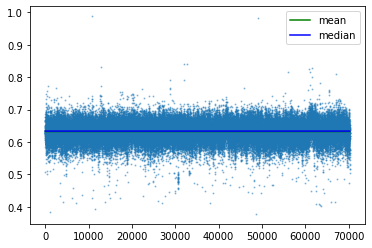

In [15]:
plot.pscores(bert_scores)

Upper half is taken 

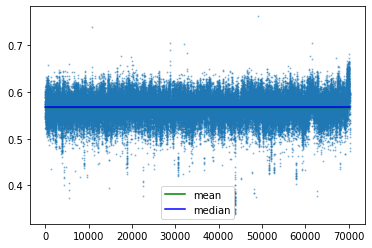

In [16]:
plot.rscores(bert_scores)

In [17]:
import numpy as np
print(np.mean(bert_scores["p"]))
np.median(bert_scores["p"])

0.63224626


0.63363624

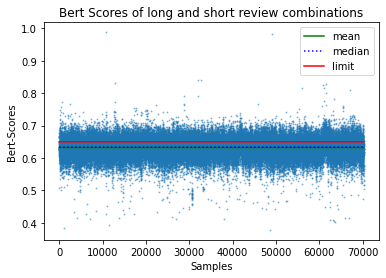

In [18]:
plot.scores(bert_scores,"p",0.65, "Bert-Scores", "Bert Scores of long and short review combinations")

In [19]:
import pickle as pkl
pkl.dump(bert_scores,open("./scores_filtered_berts.pkl","wb"))

In [20]:
import pickle as pkl
bert_scores = pkl.load(open("./scores_filtered_berts.pkl", "rb"))

In [21]:
import numpy as np

In [22]:
len(reviews_long)

70268

In [23]:
l_sums_filtered, s_sums_filtered, bert_scores_filtered = dataset_prep.filter_by_score(reviews_long, reviews_short,"p", bert_scores, threshold = 0.65)
print(f"% values left: {len(l_sums_filtered) / len(reviews_long)}")
print(f"values left total: {len(l_sums_filtered)}")

% values left: 0.2802555928730005
values left total: 19693


In [22]:
from bert_score import plot_example
plt = plot_example("He worked a long time in the day. Then he was tired and went to bed","After a long day, he went to bed", lang="en", model_type="xlnet-base-cased")

PyTorch version 1.6.0 available.
TensorFlow version 2.3.1 available.
/home/science/anaconda3/envs/tr_pegasus_env/lib/python3.7/site-packages/transformers/configuration_xlnet.py:211: FutureWarning: This config doesn't use attention memories, a core feature of XLNet. Consider setting `men_len` to a non-zero value, for example `xlnet = XLNetLMHeadModel.from_pretrained('xlnet-base-cased'', mem_len=1024)`, for accurate training performance as well as an order of magnitude faster inference. Starting from version 3.5.0, the default parameter will be 1024, following the implementation in https://arxiv.org/abs/1906.08237
  FutureWarning,
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/science/anaconda3/envs/tr_pegasus_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-22-fe6dbf04ebb1>", line 2, in <module>
    plt = plot_example("He worked a long time in the day. Then he was tired and went to bed","After a long day, he went to bed", lang="en", model_type="xlnet-base-cased")
  File "/home/science/anaconda3/envs/tr_pegasus_env/lib/python3.7/site-packages/bert_score/score.py", line 226, in plot_example
    model.to(device)
  File "/home/science/anaconda3/envs/tr_pegasus_env/lib/python3.7/site-packages/torch/nn/modules/module.py", line 607, in to
    return self._apply(convert)
  File "/home/science/anaconda3/envs/tr_pegasus_env/lib/python3.7/site-packages/torch/nn/modules/module.py", line 354, in _apply
    module._apply(fn)
  File "/home/science/anaconda3/envs/tr_pegasus_env/lib/python3.7/site-packages/tor

TypeError: object of type 'NoneType' has no len()

In [24]:
import pickle as pkl
pkl.dump(l_sums_filtered,open("./l_sums_filtered_berts.pkl","wb"))
pkl.dump(s_sums_filtered,open("./s_sums_filtered_berts.pkl","wb"))
pkl.dump(bert_scores_filtered,open("./scores_filtered_berts2.pkl","wb"))

In [6]:
import pickle as pkl
l_sums_filtered = pkl.load(open("./l_sums_filtered_berts.pkl","rb"))
s_sums_filtered = pkl.load(open("./s_sums_filtered_berts.pkl","rb"))
scores_filtered_berts = pkl.load(open("./scores_filtered_berts2.pkl", "rb"))

In [26]:
mean_rouge, var_rouge, rouge_scores = scoring.cal_rouge(s_sums_filtered, l_sums_filtered, 100)

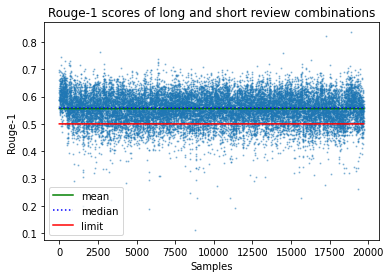

In [27]:
plot.scores(rouge_scores, "r1-p", 0.50, "Rouge-1", "Rouge-1 scores of long and short review combinations")

In [28]:
np.mean(rouge_scores["r1-p"])

0.5558241500880462

In [29]:
len(rouge_scores["rl-p"])

19693

In [30]:
import pickle as pkl
pkl.dump(rouge_scores,open("./scores_rouge.pkl","wb"))

In [4]:
import pickle as pkl
rouge_scores = pkl.load(open("./scores_rouge.pkl", "rb"))

In [7]:
l_sums_filtered_r1, s_sums_filtered_r1, rouge_scores_filtered1 = dataset_prep.filter_by_score(l_sums_filtered, s_sums_filtered,"r1-p", rouge_scores, threshold = 0.50)
print(f"% values left: {len(l_sums_filtered_r1) / len(l_sums_filtered)}")
print(f"values left total: {len(l_sums_filtered_r1)}")

% values left: 0.8576651602092114
values left total: 16890


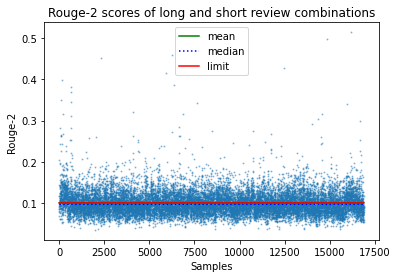

In [8]:
plot.scores(rouge_scores_filtered1, "r2-p", 0.1, "Rouge-2", "Rouge-2 scores of long and short review combinations")

In [10]:
l_sums_filtered_r2, s_sums_filtered_r2, rouge_scores_filtered_r2 = dataset_prep.filter_by_score(l_sums_filtered_r1, s_sums_filtered_r1,"r2-p", rouge_scores_filtered1, threshold = 0.1)
print(f"% values left: {len(l_sums_filtered_r2) / len(l_sums_filtered_r1)}")
print(f"values left total: {len(l_sums_filtered_r2)}")

% values left: 0.44772054470100653
values left total: 7562


In [11]:
#rouge-l cannot be used, the metrics throws out too many values

In [12]:
l_sums_filtered_rl, s_sums_filtered_rl, rouge_scores_filtered_rl = dataset_prep.filter_by_score(l_sums_filtered_r2, s_sums_filtered_r2,"rl-p", rouge_scores_filtered_r2, threshold = 0.5)
print(f"% values left: {len(l_sums_filtered_rl) / len(l_sums_filtered_r2)}")
print(f"values left total: {len(l_sums_filtered_rl)}")

% values left: 0.02763819095477387
values left total: 209


In [34]:
import pickle as pkl
pkl.dump(l_sums_filtered_r2,open("./l_sums_filtered_rouges.pkl","wb"))
pkl.dump(s_sums_filtered_r2,open("./s_sums_filtered_rouges.pkl","wb"))
pkl.dump(rouge_scores_filtered_r2,open("./scores_filtered_rouges.pkl","wb"))

In [35]:
l_sums_filtered_r2 = pkl.load(open("./l_sums_filtered_rouges.pkl","rb"))
s_sums_filtered_r2 = pkl.load(open("./s_sums_filtered_rouges.pkl", "rb"))

# Check the grammar of the texts!

In [36]:
# This paper here: https://www.aclweb.org/anthology/D16-1228.pdf

In [37]:
s_grammar_scores = scoring.cal_grammar_score(s_sums_filtered_r2)

In [38]:
pkl.dump(s_grammar_scores, open("./s_grammar_scores.pkl", "wb"))

In [39]:
s_grammar_scores = pkl.load(open("./s_grammar_scores.pkl", "rb"))

In [40]:
s_grammar_scores.keys()

dict_keys(['mean_score_sentences', 'stddev_score_sentences', 'mean_score_words', 'var_score_words', 'scores_sentence_based', 'scores_word_based'])

In [41]:
from matplotlib import pyplot as plt

In [42]:
importlib.reload(plot)

<module 'RevPrep.plotting.plot' from '/mnt/01D64EB52A75D220/Users/Science/Documents/Projekte/MA/code/RevPrep/plotting/plot.py'>

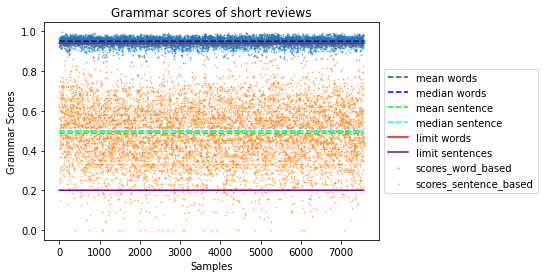

In [43]:
plot.grammar_scores(s_grammar_scores, 0.94, 0.2, "Grammar scores of short reviews")

In [44]:
s_grammar_scores.keys()

dict_keys(['mean_score_sentences', 'stddev_score_sentences', 'mean_score_words', 'var_score_words', 'scores_sentence_based', 'scores_word_based'])

In [45]:
np.mean(s_grammar_scores["scores_word_based"])

0.9491610149294853

In [46]:
scores = s_grammar_scores

In [47]:
l_sums_filtered_by_sg, s_sums_filtered_grammar = dataset_prep.filter_by_shorts_grammarscore(l_sums_filtered_r2, s_sums_filtered_r2, s_grammar_scores, threshold_words=0.94, threshold_sentence=0.2)
print(f"% values left: {(len(l_sums_filtered_by_sg) / len(l_sums_filtered_r2)) * 100}")
print(f"values left total: {len(l_sums_filtered_by_sg)}")

% values left: 71.7006083046813
values left total: 5422


### Now filter again both by bad grammar on the long summaries 

In [48]:
l_grammar_scores = scoring.cal_grammar_score(l_sums_filtered_by_sg)

In [49]:
pkl.dump(l_grammar_scores, open("./l_grammar_scores.pkl", "wb"))

In [2]:
l_grammar_scores = pkl.load(open("./l_grammar_scores.pkl","rb"))

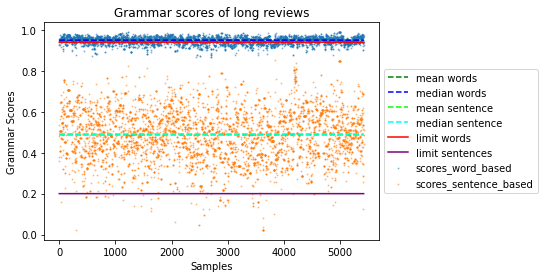

In [3]:
plot.grammar_scores(l_grammar_scores, 0.94, 0.2, "Grammar scores of long reviews")

In [53]:
l_sums_filtered_grammar, s_sums_filtered_grammar = dataset_prep.filter_by_longs_grammarscore(l_sums_filtered_by_sg, s_sums_filtered_grammar, l_grammar_scores, threshold_words=0.94, threshold_sentence=0.2)
print(f"% values left: {(len(l_sums_filtered_grammar) / len(l_sums_filtered_by_sg)) * 100}")
print(f"values left total: {len(l_sums_filtered_grammar)}")

% values left: 71.98450756178532
values left total: 3903


### What is the average compression rate of the large to short summaries? 

In [54]:
lens_long = [len(text_to_words(x)) for x in l_sums_filtered_grammar]
lens_short = [len(text_to_words(x)) for x in s_sums_filtered_grammar]

In [55]:
lens = [lens_short[i] / lens_long[i] for i in range(len(lens_short))]

In [56]:
# Amount of summaries in total:
len(lens)

3903

In [57]:
np.mean(lens)

0.40117608064451155

In [58]:
import pickle as pkl
pkl.dump(l_sums_filtered_grammar,open("./l_sums_filtered_grammar.pkl","wb"))
pkl.dump(s_sums_filtered_grammar,open("./s_sums_filtered_grammar.pkl","wb"))

In [61]:
l_sums_filtered_grammar[1002]

'Review originally posted on my book blog here As a fairytale retelling with a cyborg Cinderella, and set in New Beijing, Cinder promised to deliver a story containing some of my favorite themes. Ive had high hopes for this one so when I saw a contest for an ARC, I made sure I signed up. This review is based on an ARC copy I won from the publisher. The Premise: Its now 126 T.E. and in the teeming city of New Beijing, Linh Cinder is a talented mechanic who works out of her stall at the Weekly Market. While shes a teenaged girl, not your typical store owner, shes also a cyborg, and thus the property of her stepmother Adri, who uses Cinders income to run the household and keep her two daughters Pearl and Peony in relative comfort. Adri has no love for Cinder, and the feeling is mutual. Cinders life is not easy, but even the limited peace she has is gone when the plague comes to her home. While things are at their lowest point with her stepfamily, Cinder finds herself entangled in internat

In [62]:
s_sums_filtered_grammar[1002]

'3.5 out of 5 stars As seen on Impression Blend My relationship with fairy tale retellings as well as YA books in general lately has been a rocky one, but Im happy to tell you I have hope for the genre again. Cinder is a science fiction retelling of Cinderella, in which the main character is a cyborg and a mechanic. It takes place in New Beijing, while the country is being ravaged by a plague for which there is no cure. The book has the standard Cinderella elements: the mean stepmother, two stepsisters, a prince, a ball, and some romance. However, there are plenty of unique addictions as well, which made this book very interesting to read for me. First of all, I was very intrigued by the Lunarspeople living on the moon, most of whom possess special powers, ruled by an evil queen. I thought they were a really interesting addition, and I cant wait to find out more about them. The flip side of this is that I thought there wasnt enough about the Lunars and what their deal was, which is pro

Import the pickle and create coresponding text files for the learning process

In [63]:
dataset = [{"big_summary": l_sums_filtered_grammar[i], "small_summary": s_sums_filtered_grammar[i]} for i in range(len(l_sums_filtered_grammar))]

In [64]:
pkl.dump(dataset, open("./train_dataset.pkl", "wb"))

In [65]:
import pickle as pkl

In [66]:
data = pkl.load(open("./train_dataset.pkl","rb"))

In [67]:
type(data[0])

dict

In [68]:
import pandas as pd

In [69]:
df = pd.DataFrame(data=data)

In [70]:
df.head()

,big_summary,small_summary
0,4.5 Friends to forever Stars! Source: eARC for...,EleventyThree Mayhem of the Heart Stars Jay Mc...
1,The bestseller and awarded the GOODREADS CHOIC...,The Martian is a standalone novel written by a...
2,Crosspost: TheReadingBelle.com I found this bo...,"Well, what a great book to start off my 2015 r..."
3,Considering I am an avid fan of all things Bea...,I got a copy of this book to review through th...
4,Originally Posted on Confessions of an Opinion...,As I highly enjoyed Ready Player One I had hug...


In [1]:
#restart kernel for reproductability
from sklearn.model_selection import train_test_split
import numpy as np
import random
np.random.seed(0)
random.seed(0)

### Create datasets for different purposes

In [2]:
import pickle as pkl
l_sums_filtered_grammar = pkl.load(open("./l_sums_filtered_grammar.pkl","rb"))
s_sums_filtered_grammar = pkl.load(open("./s_sums_filtered_grammar.pkl","rb"))

In [3]:
li_big = l_sums_filtered_grammar
li_small = s_sums_filtered_grammar

#### dataset for finding proper window_size: take 30 random

In [4]:
selector = random.sample(range(len(li_big)), 30)
window_ds_big = [li_big[i] for i in selector]
window_ds_small = [li_small[i] for i in selector]
rest_li_big = np.delete(li_big, selector)
rest_li_small = np.delete(li_small, selector)

In [5]:
len(rest_li_big)

3873

#### Take 3 datasets for the benchmarking of size 300:

In [6]:
random.seed(1)
selector1 = random.sample(range(len(rest_li_big)), 300)
sample1_big = [rest_li_big[i] for i in selector1]
sample1_small = [rest_li_small[i] for i in selector1]

random.seed(4)
selector2 = random.sample(range(len(rest_li_big)), 300)
sample2_big = [rest_li_big[i] for i in selector2]
sample2_small = [rest_li_small[i] for i in selector2]

random.seed(9)
selector3 = random.sample(range(len(rest_li_big)), 300)
sample3_big = [rest_li_big[i] for i in selector3]
sample3_small = [rest_li_small[i] for i in selector3]

selec_unique = np.unique([item for sublist in [selector1, selector2, selector3] for item in sublist])

train_li_big = np.delete(rest_li_big, selec_unique)
train_li_small = np.delete(rest_li_small, selec_unique)

In [7]:
len(sample1_small)

300

In [8]:
len(train_li_big)

3031

In [9]:
pkl.dump(window_ds_big,open("./window_ds_big.pkl","wb"))
pkl.dump(window_ds_small,open("./window_ds_small.pkl","wb"))

pkl.dump(sample1_big,open("./benchmark_sample1_big.pkl","wb"))
pkl.dump(sample1_small,open("./benchmark_sample1_small.pkl","wb"))

pkl.dump(sample2_big,open("./benchmark_sample2_big.pkl","wb"))
pkl.dump(sample2_small,open("./benchmark_sample2_small.pkl","wb"))

pkl.dump(sample3_big,open("./benchmark_sample3_big.pkl","wb"))
pkl.dump(sample3_small,open("./benchmark_sample3_small.pkl","wb"))

In [10]:
big_s_train, big_s_test, small_s_train, small_s_test = train_test_split(train_li_big, train_li_small, test_size=0.2)

In [11]:
big_s_test, big_s_valid, small_s_test, small_s_valid = train_test_split(big_s_test, small_s_test, test_size=0.5)

In [12]:
len(big_s_test)

303

In [13]:
from RevPrep.Helpers.helpers import text_to_words, text_to_sentences
def split_to_max_token(target_texts, source_texts, max_word_count, overlap = 0):
    mwc = max_word_count
    out_source = []
    out_target = []
    for ind in range(len(target_texts)):
        #Every text
        target_text_sentences = text_to_sentences(target_texts[ind])
        source_text_sentences = text_to_sentences(source_texts[ind])
        
        #Calculate the amount of words of each sentence and check how many sentences can be used
        
        sentence_countw_target = [len(text_to_words(i)) for i in target_text_sentences]
        sentence_countw_source = [len(text_to_words(i)) for i in source_text_sentences]
        
        split_indices_source = []
        overlap_indices_source = []
        
        count_words = 0
        #Every sentence in that text
        i2 = 0
        for i2 in range(len(sentence_countw_source)):
            count_words = count_words + sentence_countw_source[i2]
            if i2+1 < len(sentence_countw_source):
                if count_words + sentence_countw_source[i2+1] > mwc:
                    if overlap == 0:
                        split_indices_source.append(i2 + 1)
                    else:
                        split_indices_source.append(i2 + 1)
                        #find out how many sentence can be taken with
                        c_w = 0
                        # Any range, as it will stop when x words are reached
                        added = False
                        for i in range(1,len(sentence_countw_source)-i2,1):
                          #  print(c_w)
                            c_w = c_w + sentence_countw_source[i2+i]
                          #  print(f"cw: {c_w}")
                            if c_w > overlap:
                               # print(f"using {i} additional sentences")
                                overlap_indices_source.append(i2+i+1)
                                added = True
                                break
                        if not added:
                            #add the last one
                            overlap_indices_source.append(i2+i+1)

                    count_words = 0
            else:      
                if count_words > 0:
                    overlap_indices_source.append(len(sentence_countw_source))
                    split_indices_source.append(i2 + 1)
                break
       # print(len(split_indices_source))
        #Now map the split indices with the short target text
        
        
      #  print(f"indices count: {split_indices_source}")
      #  print(f"overlap count: {overlap_indices_source}")
        
        source_total_length = np.sum(sentence_countw_source)
        target_total_length = np.sum(sentence_countw_target)
        split_indices_target = []
        overlap_indices_target = []
        sentence_target_index = 0
        sentence_source_index = 0
        for i in range(len(split_indices_source)):
          #  print(f"checking for {i}rd time")
            i_s = split_indices_source[i]
            
            if overlap > 0:
                i_ov = overlap_indices_source[i]
                overlap_word_length = np.sum(sentence_countw_source[sentence_source_index:i_ov])
                overlap_percent = overlap_word_length / source_total_length
            #    print(f"overlap_percent: {overlap_percent}")
            
            sentences_w_count = np.sum(sentence_countw_source[sentence_source_index:i_s])
         #   print(f"count words: {sentences_w_count}")
            percent = sentences_w_count / source_total_length
           # print(f"percent: {percent} for sentences: {'.'.join(source_text_sentences[sentence_source_index:i_s])}")
            count_w_temp = 0
            added = False
            
            # check for matching percental indices
            for x in range(sentence_target_index, len(sentence_countw_target) + 1, 1):
                count_w_temp = np.sum(sentence_countw_target[sentence_target_index:x])
                cur_percent = count_w_temp / target_total_length
                if added:
                    break
               # print(f"cur_percent {cur_percent} for sentence: {'.'.join(target_text_sentences[sentence_target_index:x])}")
                if cur_percent > percent:
                    if overlap > 0:
                        count_ov_w_temp = 0
                     #   print(f"sentences_countw_target: {sentence_countw_target}")
                        for o in range(x,len(sentence_countw_target)+1,1):
                            count_ov_w_temp = np.sum(sentence_countw_target[x:o])
                            cur_ov_percent = count_ov_w_temp / target_total_length
                       #     print(f"cur_ov_percent: {cur_ov_percent}")
                       #     print(f"cur percent added: {cur_ov_percent+cur_percent}")
                            if cur_ov_percent+cur_percent >= overlap_percent:
                       #         print(f"added {x}")
                        #        print(f"added ov {o}")
                                overlap_indices_target.append(x+o)
                                split_indices_target.append(x)
                        #print(f"{percent}, {cur_percent} added {target_text_sentences[sentence_target_index:x]}")
                                sentence_target_index = x
                                sentence_source_index = i_s
                          #      print(f"x is {x}")
                                added = True
                                break
                        if not added:
                        #    print(f"added {x}")
                            split_indices_target.append(len(sentence_countw_target)-1)
                            overlap_indices_target.append(len(sentence_countw_target))
                            sentence_target_index = x
                            sentence_source_index = i_s
                            added = True
                            break
                    else:
                       #     print("added")
                            split_indices_target.append(x)
                            sentence_target_index = x
                            sentence_source_index = i_s
                            added = True
                 
                #Add the last one also
            if not added:
               # print(f"added {x}")
                split_indices_target.append(len(sentence_countw_target))
                if overlap > 0:
                    overlap_indices_target.append(len(sentence_countw_target))
                            #else:
                            #    print(f"added {x}")
                             #   split_indices_target.append(len(sentence_countw_target)+1)
                             #   overlap_indices_target.append(len(sentence_countw_target)+1)
                             #   sentence_target_index = x
                              #  sentence_source_index = x
                              #  added = True
                              #  break
                
      #  if not added:
       #     print(f"added finally{x}")
        #    indices_target.append(len(sentence_countw_target))
        
        temp_last_i = 0

      #  print(split_indices_source)
       # print(overlap_indices_source)
        for i in range(len(split_indices_source)):
            if overlap > 0:
                out_source.append(".".join(source_text_sentences[temp_last_i:overlap_indices_source[i]]))
            else:
                out_source.append(".".join(source_text_sentences[temp_last_i:split_indices_source[i]]))
            temp_last_i = split_indices_source[i]
        
        temp_last_i = 0 
      #  print(split_indices_target)
       # print(overlap_indices_target)
        
        for i in range(len(split_indices_target)):
            if overlap > 0:
                out_target.append(".".join(target_text_sentences[temp_last_i:overlap_indices_target[i]]))
            else:
                out_target.append(".".join(target_text_sentences[temp_last_i:split_indices_target[i]]))
            temp_last_i = split_indices_target[i]
        
        
        
        
    return out_target, out_source
        
        # Split the texts up

In [14]:
test_texts1 = ["Das ist ein test text, mit der Nummer 1. Er hat mehrere Sätze. Der ist kurz. Das ist absolut toll und ich mag das."]#, "Das ist ein anderer Text text. mit der Nummer 2. er hat mehrere Sätze. Das ist sehr toll absolut mega toll ich finde das."]
test_texts2 = ["mit der Nummer 2. er hat mehrere Sätze. Toll."]#, "mit der Nummer 3. Ganz viele Sätze. Super."]

In [15]:
split_to_max_token(test_texts2, test_texts1, 10, 5)

(['mit der Nummer 2. er hat mehrere Sätze. Toll',
  ' er hat mehrere Sätze. Toll',
  ' Toll'],
 ['Das ist ein test text, mit der Nummer 1. Er hat mehrere Sätze. Der ist kurz',
  ' Er hat mehrere Sätze. Der ist kurz. Das ist absolut toll und ich mag das',
  ' Das ist absolut toll und ich mag das'])

In [16]:
small_s_train_nov, big_s_train_nov = split_to_max_token(small_s_train, big_s_train, 800, overlap=0)

In [17]:
small_s_test_nov, big_s_test_nov = split_to_max_token(small_s_test, big_s_test, 800, overlap=0)

In [18]:
small_s_valid_nov, big_s_valid_nov = split_to_max_token(small_s_valid, big_s_valid, 800, overlap=0)

In [19]:
len(small_s_train_nov)

4851

In [20]:
with open('datasets/finetune_ds_no_overlap/test.source', 'w') as f:
    for item in big_s_test:
        f.write("%s\n" % item)

with open('datasets/finetune_ds_no_overlap/test.target', 'w') as f:
    for item in small_s_test:
        f.write("%s\n" % item)

with open('datasets/finetune_ds_no_overlap/train.source', 'w') as f:
    for item in big_s_train:
        f.write("%s\n" % item)
        
with open('datasets/finetune_ds_no_overlap/train.target', 'w') as f:
    for item in small_s_train:
        f.write("%s\n" % item)
        
with open('datasets/finetune_ds_no_overlap/val.source', 'w') as f:
    for item in big_s_valid:
        f.write("%s\n" % item)
        
with open('datasets/finetune_ds_no_overlap/val.target', 'w') as f:
    for item in small_s_valid:
        f.write("%s\n" % item)

In [21]:
small_s_train_ov, big_s_train_ov = split_to_max_token(small_s_train, big_s_train, 700, overlap=100)

In [22]:
small_s_test_ov, big_s_test_ov = split_to_max_token(small_s_test, big_s_test, 700, overlap=100)

In [23]:
small_s_valid_ov, big_s_valid_ov = split_to_max_token(small_s_valid, big_s_valid, 700, overlap=100)

In [24]:
with open('datasets/finetune_ds_overlap/test.source', 'w') as f:
    for item in big_s_test:
        f.write("%s\n" % item)

with open('datasets/finetune_ds_overlap/test.target', 'w') as f:
    for item in small_s_test:
        f.write("%s\n" % item)

with open('datasets/finetune_ds_overlap/train.source', 'w') as f:
    for item in big_s_train:
        f.write("%s\n" % item)
        
with open('datasets/finetune_ds_overlap/train.target', 'w') as f:
    for item in small_s_train:
        f.write("%s\n" % item)
        
with open('datasets/finetune_ds_overlap/val.source', 'w') as f:
    for item in big_s_valid:
        f.write("%s\n" % item)
        
with open('datasets/finetune_ds_overlap/val.target', 'w') as f:
    for item in small_s_valid:
        f.write("%s\n" % item)

# Print for Appendix

In [10]:
from IPython.display import Markdown, display
from IPython.core.display import display, HTML
def printmd(string):
    display(Markdown(string))

In [12]:
amount = 5
for i in range(amount):
    printmd("## Original review:")
    print(l_sums_filtered_grammar[i])
    printmd("\n-------------------------------------------------------\n")
    printmd("## Assigned summary")
    printmd(f"{s_sums_filtered_grammar[i]}")

## Original review:

4.5 Friends to forever Stars! Source: eARC for Honest Review Courtesy of Author Genre: NA Contemporary Romance Part 1 in a new spin off series My Lucas Review . . . Lucas is a the first book in a spin off series from the More Than series. I dont feel like you had to have read the More Than series firs,t but I think it helps getting the back story on the gang especially Lucy and Cameron. Lukes family doesnt just open up their home, they open up their hearts. We first met the Prestons in the previous series and when I found out there was going to be a spin off series about them I nearly peed myself, I was that excited about it. : As I was just about to start reading this I realized I never read the last More Than book. At this point, I put Lucas down and jumped into More Than Enough. Again this didnt have to be read first but Im a bit OCD when it comes to series and spin offs, so I felt the compulsion to finish the More Than series first. By reading More Than Enough it also helped refres


-------------------------------------------------------


## Assigned summary

EleventyThree Mayhem of the Heart Stars Jay McLean.....THE Jay McLean, has written a book about Lucys brothers? Seriously? Its like she understood my hearts desire. Thank you Jay from all of us. Just when you thought you had to leave the goodness of the More Series to rereads. Jay gives us a new story about the friends and family that we love so much. More sweetness. More Preston Family. More Mayhem. Lucas Preston is the oldest son of a large family. A family we have meet and loved in before. We know the heartbreak that 11 year old Lucas is going to face. We know the next few years are going to be hard on his family. Now we get to experience that from a new point of view. Because my own home doesnt feel like home unless youre there. Lois aka Lois Lane aka Laney mets the Preston family during the golden years when their mom Kathy was there to make everything better. To bring her special touch to breakfast and knitting and bed time. The Preston family takes Laney in as one of their own. Especially Lucas. Lucas is her best friend and protector until they are old enough for it become more. And so without meaning to, without wanting to, I started to fall in like with a girl who would become my best friend. My confidant. My courage. But things dont always go right. Things go not right in many ways. Lucas and Laney experience the beauty of growing up together. But that also means they experience the awkwardness of growing up together. She knows who he is dating. He knows when she starts her period. They uplift each other even when they are hurting. They are the best kind of friends....the ones that put each other first. Every. Time. You already are that man. You just need to find a girl whos going to make you want to prove that. But that awkwardness that comes from being so close leads to keeping secrets. Keeping their true feelings from each other. And that leads to more heartbreak. The life and death kind. ...I hate when shes right and Im wrong and shes everything and Im nothing. I loved Lucas and Laney. While you know it cant be all sunshine, picnics on the dock, one minute cuggles, and late night knocks on the door, you really want it to be. You want to avoid that prelude. The one you forget about until it comes back around to haunt you. Love hard, love fierce, but love right. Lucas is a classic Jay McLean. It will make you laugh, cry, smile and have serious anxiety. It will make you want to come from a big family. But dont worry, you dont have to go adopt more siblings. The Prestons have plenty to go around. And they dont mind sharing.

## Original review:

The bestseller and awarded the GOODREADS CHOICE 2014 WINNER and which is said to have done well at the box office since October 02, 2015 is indeed WORTH READING. I repeat it is WORTH READING. If you have not read it yet and have been curious about why it is such a big talk in the Goodreads universe, I would like you to bear in mind first some reminders before you prep it but not necessarily that you take them; I know you would still give it a try at any cost out of idle curiosity. You should be ready that reading it requires a paucity of MATH and other branches of science such as CHEMISTRY, ASTRONOMY, ENGINEERING, PHYSICS , BOTANY, to name a few unless you majored in one of them. Otherwise, you might end up in a moment of epistaxis and cerebral hemorrhage. In other words, the novel is strewn with technical words. Therefore, make sure that you have internet connection at your disposal to Google some words beyond your imagination. In doing so can help you understand the story more clearl


-------------------------------------------------------


## Assigned summary

The Martian is a standalone novel written by author Andy Weir. In my opinion, there is not a set genre for this book. Sure it is said to fall into the science fiction category, but its more like fictional science. This sounds like a criticism but its not! The science is real and I dont question the accuracy of the details. But it is first and foremost a science book that happens to take place in a fictional storyline. Im a science girl, so even though I was eating up all the technical stuff, I was still caught off guard at the sheer amount of it given the fiction marketing. However, its so encouraging to see how readers are responding to this book. And now its being adapted to film! I loved the main character, Mark Watney who gets stranded on Mars. Mr. Weir writes his character with smartass, laidback humor that made the book feel a bit dark at times given the likelihood of his death at every turn. These factors of course made me eager to research the author a bit to see his inspiration for this story. Mr. Weirs website reveals the following: Biography:ANDY WEIR was first hired as a programmer for a national laboratory at age fifteen and has been working as a software engineer ever since. He is also a lifelong space nerd and a devoted hobbyist of subjects like relativistic physics, orbital mechanics, and the history of manned spaceflight. The Martian is his first novel. Inspiration for The Martian:I was thinking up how best to do a manned Mars mission because thats the sort of dork I am. As the plan got more detailed, I started imagining what it would be like for the astronauts. Naturally, when designing a mission, you think up disaster scenarios and how likely the crew would be to survive. Thats when I started to realize this had real story potential. Overall, I really liked The Martian and would recommend it to readers who enjoy a mixture of space science, survival stories, comedy, and 1970s entertainment just trust me. Enjoy! My favorite quote: If a hiker gets lost in the mountains, people will coordinate a search. If a train crashes, people will line up to give blood. If an earthquake levels a city, people all over the world will send emergency supplies. This is so fundamentally human that its found in every culture without exception. Yes, there are assholes who just dont care, but theyre massively outnumbered by the people who do. The film adaptation will be directed by Ridley Scott and will feature an impressive cast lead by Matt Damon. Check out these movie stills: 05302015: More movie stills!

## Original review:

Crosspost: TheReadingBelle.com I found this book to be very okay. I really love the cover and this book is always recommended to me. I finally picked it up and I didnt love it as much as I hoped I would have. The story really picks up when Lara finds out that the letters she has written have been mailed to the five guys that she has loved. Josh is one of the recipients of the letters. He is Margots exboyfriend, and the typical boy next door. He receives a letter from Lara Jean, and his friendship with Lara Jean becomes rocky and confusing. Though Josh tries to figure out the reasoning behind the letter, Lara Jean pretends to be in a relationship with Peter, the most popular boy at school. If I were in her shoes, I would have been very traumatized by that situation and would probably have to move to another city. Instead, Lara Jean kinda brushes that incident aside, and doesnt really try to figure out who would send the letters. Lara Jean was a really likable protagonist, she really fel


-------------------------------------------------------


## Assigned summary

Well, what a great book to start off my 2015 reading year! I absolutely loved this book! This was my first Jenny Han book, but it definitely will not be my last! In fact, I just bought Burn for Burn. So, Ill read that at some point! : Jennys writing is beautiful. Its simple and easy to read but it has this elegance to it. She really knows how to make the reader really invest in her writing. She makes you believe that these characters are real. She makes you want to care about them and I loved that! Plus, look at that cover! I love that it has that Sharpie feel to it. : The characters. I loved some more than others. Number one, I loved Lara Jean. She was relatable and cute in a quirky way. : I really enjoyed getting to know her and sharing this experience with her. Margot. Not a huge fan of her, to be honest. I liked her, but I didnt love her. I felt at times she was just plain mean. I loved Kitty. I thought she was adorable and she definitely acted her age, but then showed some maturity as well. Josh. Mmmm, not a big fan. He didnt really do it for me. Margot can have him! Plus, I didnt like Josh and Lara Jean together anyways. Peter K, I adored him! My favorite part was being able to read the letters. That was a fun aspect and something I was looking forward to. The story line was interesting. And I loved the fake relationship. I loved the fresh start that Lara Jean and Peter gave to each other. My least favorite part and the only reason why it is a 4 star review was the voice. Lara Jean I ended up loving, but it took me a while to warm up to her voice. At times she sounded so young maybe it was just because she was more goodytwoshoe and then at times she sounded so mature. I ended up loving her and I got used to the voice. And she did seem like she grew up by the end of the book. And speaking of that ending... WTF was that! You heard me, it has a freaking cliffhanger! Thats not normal with a standalone novel, oh wait, its a duology! YAY! But seriously, I want more. When I read it, I thought I was reading a standalone novel. And then with that ending I was like Oh, hell no, you are not leaving me at that open ender! Thank god there is more coming!

## Original review:

Considering I am an avid fan of all things Beauty and the Beast, it could only be expected that a new fantasy novel that is toted at a retelling of this beloved fairy tale would be right up my alley. Throw in having it written by the highly talented Naomi Novik and I knew I had to read Uprooted. Unfortunately, a slow start almost had me missing out on one of the best novels of 2015. When I started reading Uprooted, Ill admit I didnt feel a connection with anything in the novel. I didnt really feel anything for the main character, Agnieszka. It wasnt that I disliked her; I just found there was a connection lacking. As the story progressed and more characters were thrown in, I still struggled to find a connection with anyone  The Dragon, Kasia, anyone in the book. It just wasnt happening for me. That is until the halfway point. Suddenly, at around page 150 or so, something clicked and I found myself invested in the story. I found I was connecting and bonding with Agnieszka. I was into th


-------------------------------------------------------


## Assigned summary

I got a copy of this book to review through the Amazon Vine program. I have never read anything by Novik, although I want to read her Temeraire series. I was very eager to finally read a book by her, especially one that is supposed to have a very fantasy fairy tale feel to it. This was an absolutely wonderful fairy tale fantasy, I absolutely adored it and had a hard time putting the putting the book down! Agnieszka loves her small village home even though it lies close to the corrupted Wood. The villagers pay a small price for their safety, the powerful magician known as the Dragon takes one young woman into his tower every ten years. Agnieszka knows it will be her best friend Kasia this time. Kasia is beautiful and smart and brave and everything special that the Dragon normally looks for in a girl. Imagine Agnieszks surprise when the dragon does not choose Kasia at all but her. This was just a perfect book. I loved the characters and the fairy tale qualities the story had. The book has a lot of traditional fairy tale elements as well; deep dark woods, a wizard in a tower, an unlikely heroine. Novik did a beautiful job of blending traditional fairy tale elements into a beautiful and original fantasy story. The story seems so simple to start but gets so complex and interesting as it continues. Agnieszka is a wonderful heroine; shes determined and outspoken yet also compassionate and caring. She has a different way of looking at things that puts her in opposition to the Dragon, yet also lets her complement the Dragons style of magic well. And the Dragon...oh the Dragon...he is such a delightful character. I really enjoyed watching Agnieszka break through his gruff exterior. The Dragon is so abrupt and gruff but does such a great job caring for all of the villagers in the valley. You just know there is more to him than meets the eye. This book was just one of my favorite types of books, it balances so many elements so well. There is wonderful magic, a well thought out world, action, endearing characters, an engaging plot, and some romance. Really I just cant say enough good things about this book I adored it. Overall this book was just perfection. It was a wonderful fantasy with a very fairytale like feel to it. I highly recommend this book to all the fantasy fans out there; it was just such an engaging and beautiful read. So far this is one of my favorite books of the year!

## Original review:

Originally Posted on Confessions of an Opinionated Book Geek Okay, ever since I read Ready Player One two years ago and recommended it to basically everyone I knew including my boyfriend, who I am proud to say now calls RPO his favorite book of all time I have been anticipating Armada ever since I saw it on Goodreads. When the synopsis was released I went Okay, sounds like Enders Game. Im still probably going to enjoy this more because ERNEST CLINE!! I wasnt wrong. I enjoyed this more than Enders Game, but Armada is certainly not the masterpiece RPO was. Its a little disappointing because even though I told myself not to have such high expectations for the book because Armada and RPO sounded so vastly different, I still couldnt help it because I had been waiting SOO LONGG. Anywho, Zack Lightman appears to be your typical teenager, except he has some serious anger issues, daddy issues, and is one of the worlds top Armada players. His dad died in a work accident 17 years ago, when Zack w


-------------------------------------------------------


## Assigned summary

As I highly enjoyed Ready Player One I had huge expectations for Armada when I first saw that there would be another novel about a similar topic from the same author. After finishing it Im glad I toned them a bit down before the start. I still enjoyed Armada a lot, but it wasnt perfect neither was Ready Player One though and if Im honest I probably would have to adjust my rating for that one a bit. The story of Armada is definitely catchy but you have to endure a lot of geekynerdy things. Its interesting, intriguing and figuring out the truth about the Europans was one thing that stopped me from putting the book down more than once. I didnt know I would be interested in the SciFi genre as I only picked this up for the video game aspect and never really cared about either SciFi books nor movies before, but Armada definitely convinced me from the opposite thing. SciFi stories can actually be interesting. I think this is one thing Armada does very well. It catches your attention even if you havent been interested in SciFi related things before. You wont be completely lost in an universe of nerd knowledge without any help from the author. The characters are well thought through and have a familiar feeling about them maybe because they are a bit cliched. There wasnt anyone I liked in particular, but I didnt find myself annoyed with anyone either so I think this is a bit of a bonus. Some things werent all that great with Armada. The flow of the book was a bit... off. I didnt find myself annoyed at the huge explanations all the time which is a good thing!, because they were interesting and easy to read. Everything made sense depending on what part of the story you were at. The end was something entirely different. It felt very rushed. As if Cline all of a sudden lost interest or motivation in giving the story a proper conclusion. The story felt a lot like a video game written down in form of a book and while everything worked out pretty good the end simply didnt. As a gamer Im used to fast endings, but in a book this simply felt wrong to me. Especially because Cline seemed to focus on everything and everyone but the main character and his relationships suddenly realizing in the last paragraph that he forgot to give Zack any depth for the future. The relationships was another thing I found a bit annoying. While I enjoyed Zacks relationships a lot they all had a nice timing and feeling to them every other relationship built by secondary characters felt cliched to the maximum. I wouldnt have needed this at all. I didnt only sigh at every single mention of it  it also felt unrealistic. As if all humanity would have in mind as soon as they know the world will end is sex and finding someone to mingle. There also were other details I found myself a bit annoyed at, but maybe they are just personal preferences. Armada was a great read I enjoyed very much and would have read in two days if I would have had more time. Id recommend it to anyone interested in video games gamers and nonegamers alike, anyone who enjoys nerdy things and of course anybody who enjoyed Ready Player One before, because I think most of them will enjoy this one, too.